In [ ]:
#Loading the essential libraries
import numpy as np
import matplotlib.pyplot as plt

def train_perceptron(X, y):
   #learning rate (lr)this determines how big of an adjustment it makes to these values after each error.
    lr = 0.1
   #iteration no (n_iter)this is also know as epochs it tell how many times the learning algorithm will work through the entire training dataset
    n_iter = 20

    # We start with no knowledge - weights and bias are zero. The weights determine how much importance the model gives to each input.
    #By initializing them to [0.0, 0.0], we are telling the model to start with the assumption that all inputs are equally unimportant.
    #It has no initial preference for input 1 or input 2.
    #The bias acts like a general threshold that helps the model make a decision.
    #Starting it at zero provides a neutral baseline making it either inherently easy nor hard for the model to output a 1
    weights = np.zeros(X.shape[1])
    bias = 0.0

    # training loop.
    for _ in range(n_iter):
        # Go through each example (input/output pair)
        for i in range(len(X)):
            # Calculating the weighted sum
            prediction_raw = np.dot(X[i], weights) + bias

            # Using a step function to decide the output: 0 or 1
            #If the raw score is positive or exactly zero, the neuron "fires," and its output is 1.
            #If the raw score is negative, the neuron does not fire, and its output is 0
            prediction = 1 if prediction_raw >= 0 else 0

            # Figure out the error. If we were right, error is 0.
            error = y[i] - prediction

            # Update the weights and bias to correct the mistake.No update if the error is 0.
            weights += lr * error * X[i]
            bias += lr * error

    #returning what the model has learned
    return weights, bias



In [ ]:

# Here we are defining the dataset for all the logic gates
# The inputs are the same for all gates.
inputs = np.array([
    [0, 0], [0, 1], [1, 0], [1, 1]
])

# The expected output for each gate.
gate_outputs = {
    "AND": np.array([0, 0, 0, 1]),
    "OR":  np.array([0, 1, 1, 1]),
    "AND-NOT": np.array([0, 0, 1, 0]),
    "XOR": np.array([0, 1, 1, 0])
}

In [ ]:
#2. Now, let's train and test a perceptron for each gate.
for gate_name, outputs in gate_outputs.items():
    print(f"\n################################")
    print(f"  Training for {gate_name} Gate")
    print(f"##################################")

    # Train the model and getting the knowledge
    trained_weights, trained_bias = train_perceptron(inputs, outputs)

    print(f"Learned Weights: {np.round(trained_weights, 2)}")
    print(f"Learned Bias: {np.round(trained_bias, 2)}")
    print("#######Testing Results##########")

  #observing how well the model has learned
    correct_count = 0
    for i in range(len(inputs)):
        # Make a prediction using the learned weights and bias
        final_prediction_raw = np.dot(inputs[i], trained_weights) + trained_bias
        final_prediction = 1 if final_prediction_raw >= 0 else 0

        if final_prediction == outputs[i]:
            correct_count += 1

        print(f"Input {inputs[i]} ==> Predicted: {final_prediction} (Actual: {outputs[i]})")
    #calculating the accuracy of the model percentage of time the model predicted the correct answer
    accuracy = (correct_count / len(inputs)) * 100
    print(f"Accuracy: {accuracy}%\n")


################################
  Training for AND Gate
##################################
Learned Weights: [0.2 0.1]
Learned Bias: -0.2
#######Testing Results##########
Input [0 0] ==> Predicted: 0 (Actual: 0)
Input [0 1] ==> Predicted: 0 (Actual: 0)
Input [1 0] ==> Predicted: 0 (Actual: 0)
Input [1 1] ==> Predicted: 1 (Actual: 1)
Accuracy: 100.0%


################################
  Training for OR Gate
##################################
Learned Weights: [0.1 0.1]
Learned Bias: -0.1
#######Testing Results##########
Input [0 0] ==> Predicted: 0 (Actual: 0)
Input [0 1] ==> Predicted: 1 (Actual: 1)
Input [1 0] ==> Predicted: 1 (Actual: 1)
Input [1 1] ==> Predicted: 1 (Actual: 1)
Accuracy: 100.0%


################################
  Training for AND-NOT Gate
##################################
Learned Weights: [ 0.1 -0.2]
Learned Bias: -0.1
#######Testing Results##########
Input [0 0] ==> Predicted: 0 (Actual: 0)
Input [0 1] ==> Predicted: 0 (Actual: 0)
Input [1 0] ==> Predicted: 1 (Act

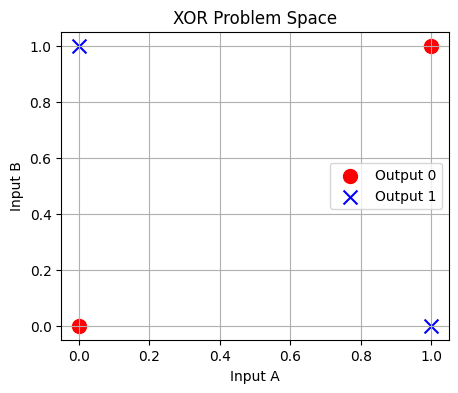

The reason for the failure caused is that the perceptron can't find a single line to separate the 0s from the 1s,
In simple words we can say that this is a classical example non-linearly separable problem


In [ ]:
# 3 A plot to show XOR the problem
y_xor = gate_outputs["XOR"]
plt.figure(figsize=(5, 4))
plt.scatter(inputs[y_xor==0, 0], inputs[y_xor==0, 1], c='red', marker='o', s=100, label='Output 0')
plt.scatter(inputs[y_xor==1, 0], inputs[y_xor==1, 1], c='blue', marker='x', s=100, label='Output 1')
plt.title("XOR Problem Space")
plt.xlabel("Input A")
plt.ylabel("Input B")
plt.legend()
plt.grid(True)
plt.show()
print("""The reason for the failure caused is that the perceptron can't find a single line to separate the 0s from the 1s,
In simple words we can say that this is a classical example non-linearly separable problem""")


###1.How do the weights and bias values change during training for the AND gate?
The weights and bias start at 0.0. During training, the perceptron looks at each input pair. If a mistake happens,weights and bias are being adjusted to correct that error. For the AND gate, it learns that the both inputs are eing important. The final trained values from your code are weights: [0.2 0.1] and bias: -0.2. The positive weights show that both inputs contribute to a (1) output, while the negative bias acts as a threshold, making sure that the output is only 1 when both inputs are 1.

###2.Can the perceptron successfully learn the AND logic with a linear decision boundary?
Yes, The code shows an accuracy of 100.0%. This is because the AND gate is a linearly separable problem. You can draw a single straight line on a graph to separate the input points that result in a (0)from the one point ([1, 1]) that results in a (1).

###3.What changes in the perceptron's weights are necessary to represent the OR gate logic?
To represent the OR gate, the perceptron is needed to learn that if at least one input is 1, the output should be 1. We can see from the code that the learned weights are: [0.1 0.1] and the  bias: -0.1. Similar to the AND gate, the weights are positive. However, the bias is less negative (-0.1 for OR compared to that of -0.2 for AND). This lower value makes it easier for the neuron to activate, allowing it to output 1 even if only one input is active.

###4.How does the linear decision boundary look for the OR gate classification?
The decision boundary is a straight line that separates the [0, 0] input (output 0) from the other three inputs (output 1).

###5.What is the perceptron's weight configuration after training for the AND-NOT gate?
The AND-NOT gate outputs 1, only when the first input is 1 and the second is input is 0. The weights we obtained while training are : [ 0.1 -0.2] and bias: -0.1. Notice that the weight for the first input is positive (encouraging a 1 output) while the weight for the second input is negative (discouraging a 1 output).

###6.How does the perceptron handle cases where both inputs are 1 or 0?
It handles them correctly by using the negative weight for the second input.
Input [1, 1]: The negative weight (-0.2) for the second input cancels out the positive weight from the first input, resulting in a negative sum. The prediction is correctly 0.Input [0, 0]: With no positive input, the negative bias ensures the result is negative.That is 0

###7.Why does the Single Layer Perceptron struggle to classify the XOR gate?
The Single Layer Perceptron fails because the XOR gate is not linearly separable. That is we cannot draw a single straight line to separate the points that should output 0 ([0,0] and [1,1]) from the points that should output 1 ([0,1] and [1,0]). A single perceptron can only create one straight line, so it  becomes impossible to solve this problem. This is why the accuracy is only 50%

###8.What modifications can be made to the neural network model to handle the XOR gate correctly?
To solve the XOR problem, the model needs to be able to create a more complex, non-linear decision boundary. This can be achieved in two main ways adding  more Layers instead of a single-layer perceptron, you can use a Multi-Layer Perceptron. By adding a "hidden layer" of neurons between the input and output, the network can combine simple lines to form a more complex shape that correctly separates the XOR data. Another method is to use Non-Linear Activation Functions the simple step function used in the perceptron is linear. Using a more advanced, non-linear activation function like Sigmoid or ReLU in a multi-layer network allows it to learn non-linear relationships like the one in the XOR gate.